In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

In [2]:
df=pd.read_csv('Pleiades_Cluster.csv')
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [3]:
def dist(pl):
    return 1000/pl

In [4]:
df['d']=dist(df['plx'])

In [5]:
def absmag(dis,gm):
    return gm-5*np.log10(dis)+5

In [6]:
df['abs_mag']=absmag(df['d'],df['gmag'])

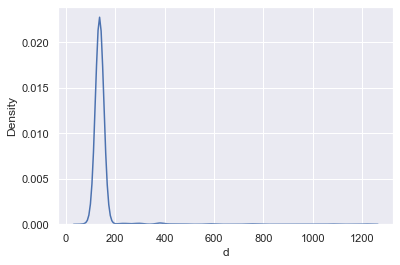

In [7]:
sb.set(style='darkgrid')
sb.kdeplot(df['d'])
plt.show()
#can see the outliers are for distance greater than 200 parsecs so lets filter that

In [8]:
df1=df[df['d']<=200]
#df1 is the dataframe without outliers, ie distance less than 200 parsecs

In [9]:
df1=df1.dropna()
df1

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,d,abs_mag
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,154.004943,6.985679
7,12.179868,55.676693,23.502644,8.294176,1.369455,0.165852,4861.0350,0.574189,120.566527,6.773734
16,9.992064,56.541942,23.339798,8.131807,0.806358,1.134270,5775.0000,1.063915,122.973890,4.542999
17,9.312448,56.422574,24.288397,7.762786,0.729657,2.300188,6020.8667,1.393851,128.819729,3.762536
18,8.538714,56.552969,23.128325,12.674684,0.755633,1.763094,5969.3335,1.241477,78.897430,4.053400
...,...,...,...,...,...,...,...,...,...,...
976,11.048224,56.061257,24.101442,6.949595,1.317020,0.648189,5000.0000,1.072910,143.893278,5.258021
978,9.703188,54.788129,24.367629,6.955217,0.757366,2.007155,5924.1250,1.344915,143.776965,3.914741
979,9.779877,56.710653,23.239006,6.497724,0.746530,2.140879,5945.6665,1.378947,153.900040,3.843683
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,173.016572,5.662324


In [10]:
avg_dist=df1['d'].mean()
print("The average distance to the Pleiades Cluster is",avg_dist,"parsecs")
#end of part 1

The average distance to the Pleiades Cluster is 136.7445512623069 parsecs


In [11]:
def lum(mag):
    log_l=(4.77-mag)/2.5
    return np.power(10,log_l)

In [12]:
df['lumi']=lum(df['abs_mag'])

In [13]:
def temp(color):
    return 5601/(color)**(2/3)

In [14]:
df['temp']=temp(df['bp_rp'])

In [15]:
def rad(lum,tem):
    return ((lum**0.5)/((tem/5778)**2))

In [16]:
df['radi']=rad(df['lumi'],df['temp'])

In [17]:
index=np.empty(df.shape[0])
for i in range(1,df.shape[0]+1):
    index[i-1]=i

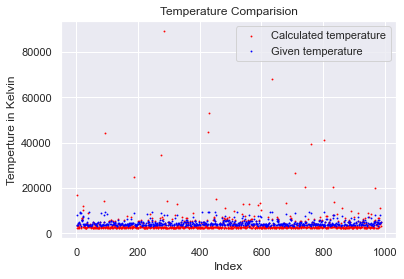

In [18]:
plt.figure()
plt.scatter(index,df['temp'],label='Calculated temperature',c='red',s=0.75)
plt.scatter(index,df['teff_val'],label='Given temperature',c='blue',s=0.75)
plt.title("Temperature Comparision")
plt.xlabel("Index")
plt.ylabel("Temperture in Kelvin")
plt.legend()
plt.show()

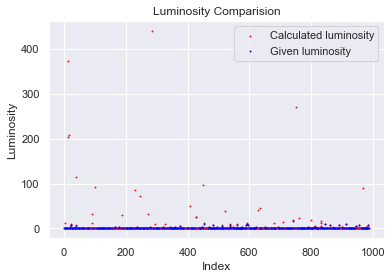

In [19]:
plt.figure()
plt.scatter(index,df['lumi'],label='Calculated luminosity',c='red',s=0.75)
plt.scatter(index,df['lum_val'],label='Given luminosity',c='blue',s=0.75)
plt.title("Luminosity Comparision")
plt.xlabel("Index")
plt.ylabel("Luminosity")
plt.legend()
plt.show()

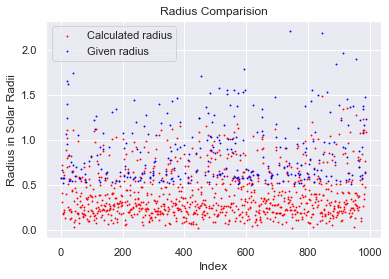

In [20]:
plt.figure()
plt.scatter(index,df['radi'],label='Calculated radius',c='red',s=0.75)
plt.scatter(index,df['radius_val'],label='Given radius',c='blue',s=0.75)
plt.title("Radius Comparision")
plt.xlabel("Index")
plt.ylabel("Radius in Solar Radii")
plt.legend()
plt.show()

In [21]:
print("The calculated luminosity is very close to the given values but the same can't be said for the radii or the temperature")

The calculated luminosity is very close to the given values but the same can't be said for the radii or the temperature


In [22]:
max_gmag=max(df['gmag'])
df['brightness']=max_gmag-df['gmag']

In [23]:
df.loc[df['ra']>180, 'ra']=df['ra']-360

In [24]:
def stereo(ra, dec):
    theta = np.deg2rad(90-dec + dec.mean())
    phi = np.deg2rad((ra-ra.mean())*15)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    X = x/(1-z)
    Y = y/(1-z)
    return X,Y

Text(0.5, 1.0, 'Pleiades')

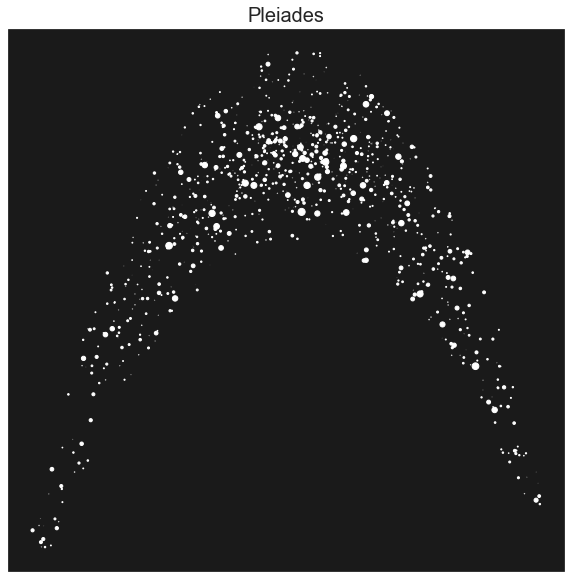

In [25]:
x,y=stereo(df['ra'],df['dec'])
s = 10**(-df['brightness']/2.5) 
s = s/s.max()*50
plt.figure(figsize=(10,10))
plt.gca().set_facecolor('k')
plt.scatter(-y,x,s=s,color='w')
plt.xticks([])
plt.yticks([])
plt.title('Pleiades',size=20)
#end of part 3

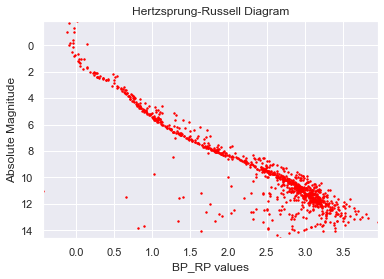

In [26]:
plt.figure()
plt.scatter(df['bp_rp'],df['abs_mag'],s=2,c='red')
plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("BP_RP values")
plt.ylabel("Absolute Magnitude")
plt.axis([min(df['bp_rp']),max(df['bp_rp']),max(df['abs_mag']),min(df['abs_mag'])])
plt.show()
#based on the figure I estimate that for stars having bp_rp values less than 0, the stars deviate from the main sequence.

In [27]:
#Using the relation L/Lo = (M/Mo)^3.5 to get the turnoff mass

df2=df[df['bp_rp']<=0]
df2=df2.reset_index()
print(df2.loc[df2['bp_rp'].idxmax()])

index          628.000000
gmag             6.408999
ra              56.512177
dec             24.527704
plx              7.345347
bp_rp           -0.014213
lum_val               NaN
teff_val      9654.000000
radius_val            NaN
d              136.140611
abs_mag          0.739061
lumi            40.961479
temp                  NaN
radi                  NaN
brightness      13.476987
Name: 11, dtype: float64


In [28]:
turnoff_mass=df2['lumi'].loc[11]**(1/3.5)
#solar masses

In [33]:
#t=age_of_sun * (Lo*M)/(Mo*L)

age=turnoff_mass/df2['lumi'].loc[11] * 4603

print("The age of the cluster is approximately",age,"million years,")

The age of the cluster is approximately 324.59669598441246 million years,
